# Seaborn

[seaborn](https://github.com/mwaskom/seaborn)是一个基于matplotlib的python可视化库。提供了绘制统计图形的高级接口。也是一个使用者很多的可视化库。

## 安装

安装seaborn

```Shell
conda install -c conda-forge seaborn
```

## 简介

文档参考：[seaborn: statistical data visualization](https://seaborn.pydata.org/)的[introduction](https://seaborn.pydata.org/introduction.html#introduction)

seaborn和pandas也结合的很好，基于matplotlib绘制。主要功能有：

- 检验多变量之间的关系
- 对类别变量统计的特别支持
- 单变量和二元变量的可视化，以及数据集内比较它们
- 线性回归模型可视化
- 复杂数据集整体结构可视化
- 复杂多图的高级抽象
- 内置主题轻松配置图形
- 调色板工具

接下来通过一个小示例，看看seaborn的基本使用方法。

In [4]:
# Pandas for managing datasets
import pandas as pd

In [5]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

seaborn使用matplotlib库，因此在jupyter中，注意在运行seaborn代码前，要先让matplotlib可显示。另外因为是绘制各类统计图，所以pandas也是常客。

接下来就是第一步，首先导入seaborn，通常以sns的名称导入。

In [6]:
# Seaborn for plotting and styling
import seaborn as sns

接下来就是通过set函数设置一些样式，如果set没有参数，那就是直接使用默认的theme，scaling和color palette。seaborn默认的这些设置都是建立在 matplotlib rcParam system 基础上的。

除了默认的，还有一些选项可以选择，可参考：[several other options](http://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)。

Seaborn将matplotlib参数分成两个独立的groups。一个是绘图的美术风格，第二个是scale图形不同的元素的。

对应的，操作这两个group参数的也是两组函数。控制style的有：axes_style() and set_style() 函数。控制scale的：plotting_context() and set_context() 函数。

seaborn里有一些设置好的themes，包括：darkgrid, whitegrid, dark, white, and ticks。默认的是darkgrid。

除了这些风格之外，seaborn还允许用户定制styles，通过向axes_style() and set_style()的rc 传递参数，可以重写一些风格设置参数。具体有哪些参数可以调用如下命令得到，然后通过类似“sns.set_style("darkgrid", {"axes.facecolor": ".9"})”的代码即可实现定制化。

In [7]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

关于scaling plot elements，也有一个参数集来控制，这个参数集可以配置。有四个默认的contexts：paper, notebook, talk, and poster.  其中，notebook是默认的。通过“sns.set_context("paper")”代码可以配置。当然也可以通过类似上面的方式类配置具体的参数：
```python
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
```

紧接着第三步，就是加载数据了，如下所示是使用的load_dataset函数，这是个调用官方示例数据集的函数，它们都是pandas的dataframe。如果将自己的数据集组织成tidy数据集，那么就能充分运用seaborn的优点。

seaborn的数据集特定的格式是“long-form”的或者称为“tidy”数据，关于该数据类型是什么意思可以参考这个[academic paper](http://vita.had.co.nz/papers/tidy-data.html)，这个文件也不大，所以放到该文件夹下了，如果需要翻译，可以参考：[数据整理（Tidy Data）—翻译Hadley Wickham的一篇论文](https://zhuanlan.zhihu.com/p/27579776) 。这里暂简单对tidy dataset的定义做些介绍性记录。

tidy dataset核心思想是：“整齐的数据”就是每个变量是一列，每组观测是一行，并且each type of observational unit都可以组成一个table。这会使数据的处理变得简单。实际处理过数据的都知道，数据清理工作花费的时间是很多的。包括离群值检查，数据解析，缺失值处理等。tidy datasets这种标准化的结构化数据集的方式可以让初期的数据清洗变得简单，因为有了它就不需要重复造轮子了。tidy datasets的核心思想其实并不稀罕，就是**关系型数据库**和关系代数，只不过是以一种**统计学的角度**来描述。这种数据哲学也体现在了两个作者开发的R数据工具包中：plyr和ggplot2.

简单解释核心思想：整齐的数据都是相似的，但是混乱的数据各有各的混乱。数据集是值的集合，包括定量和定性的。值以两种方式组织，一是varaible，一是observation。一个varaible包括了相同underlying attribute（比如高度，温度等）不同units的所有values，一个observation包括了相同unit（比如某人，某天等）不同attributes的所有values。比如[原文表3](v59i10.pdf) 一个3 variables, 6 observations 的datasets包括18个值。每列一个variable，每行一个observation。（单独对某个实例分析什么是变量什么是观测是容易的，但是从更general的角度来描述是困难的。）一个数据集是不是tidy data的要看它的行，列和tables是如何和observations，variables和types匹配的。tidy数据就是符合第三范式的数据。简言之，就是列原子性+主键唯一标识（论文表3里可以理解dataframe自动加的有行索引是主键）+非主键属性直接依赖于主键而不依赖于非主键。翻译到统计语言下，就是上一段文字开头描述的核心思想，简单解释下第三条，这条容易confused，个人理解就是说表内属性有依赖的，违背了第三范式，比如[原文表8](v59i10.pdf)，每个week每个track的歌手和时间是完全对应且不变的，因此数据是冗余的，可以分成两个数据集song和rank，表13有展示分开后的样式。具体的数据组织，fixed variable放在前面比较好，然后是measured values，对于每行observation就对应列的形式组织下去即可。

以上就是tidy Dataset的意思，总之，如果了解关系数据库，就理解成关系型数据库的表设计就好了。后面用到相关数据整理技巧时，再对这篇文章做进一步解读，关于将dataframe数据处理成tidy data的形式可以参考：[Modern Pandas (Part 5): Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

下面先给一个数据的例子，看看数据的原子性。

In [4]:
import pandas as pd
df = pd.DataFrame({'total_bill': [1, 1, 3, 4, 5], 'tip': [1, 1, 3.56, 3.31, 3.61], 'sex': ["Female", "Female", "Male","Male","Male"], 'smoker':["No", "No", "No", "Yes", "Yes"],
                   "day":["Monday", "Tuesday","Wednesday","Thursday", "Friday"], "size":[1, 1, 3, 4, 5]})
df

,total_bill,tip,sex,smoker,day,size
0,1,1.00,Female,No,Monday,1
1,1,1.00,Female,No,Tuesday,1
2,3,3.56,Male,No,Wednesday,3
3,4,3.31,Male,Yes,Thursday,4
4,5,3.61,Male,Yes,Friday,5


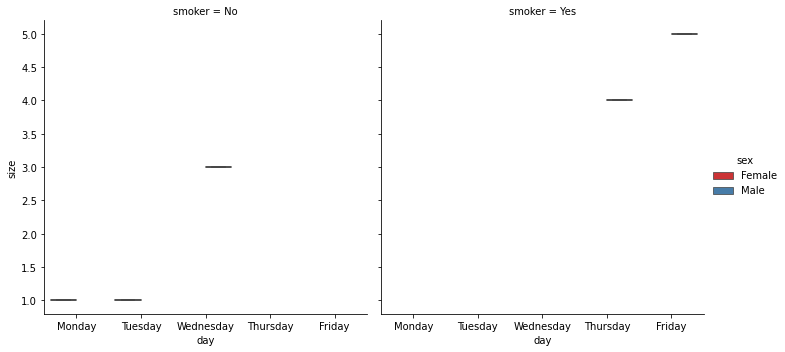

In [5]:
import seaborn as sns
g = sns.catplot(x="day", y="size",
                    hue="sex", col="smoker",
                    data=df, palette="Set1",
                    kind="box", dodge=True, showfliers=False)

第一行和第二行数据有一项不同就满足原子性

In [8]:
sns.set()
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


最后一步就是调用绘制函数replot()，这个函数绘制了tips数据集中5个variables的关系。3个是数值型变量，2个是categorical的。两个数值变量确定了坐标位置，size变量决定了点的大小，time变量将数据分到了两个子图上，最后smoker变量标识了点的颜色。

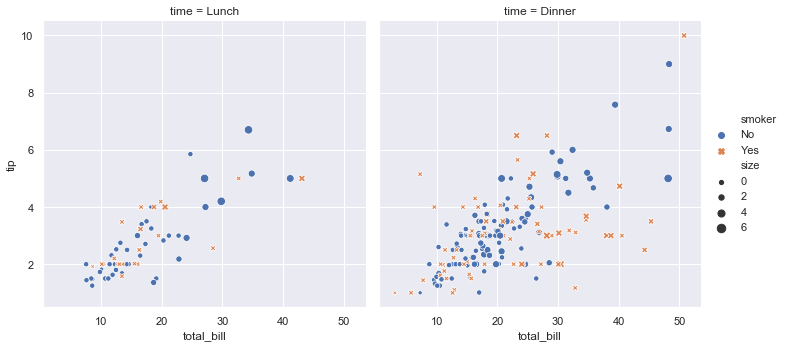

In [9]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

在数据可视化过程中，并没有银弹。要具体问题具体分析。不过seaborn尽可能地让数据可视化变得简单。replot()函数之所以被叫做“re”plot，是因为它可以可视化不同的统计关系。比如：

In [7]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


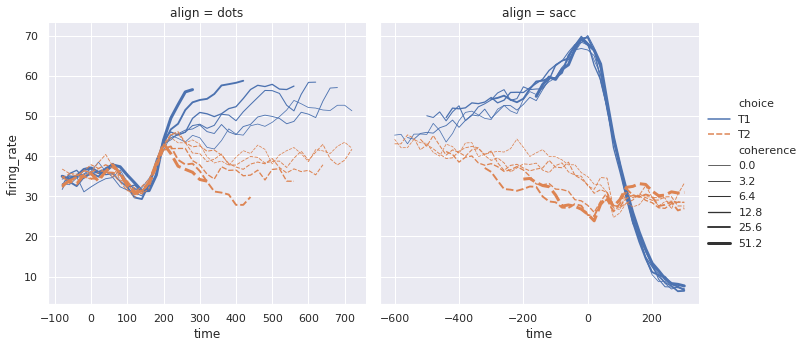

In [8]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

根据数据实际情况，可以配置replot的kind参数，选择折线图来可视化时间序列数据。

有时候我们会比较关心统计估计和误差范围。

In [9]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


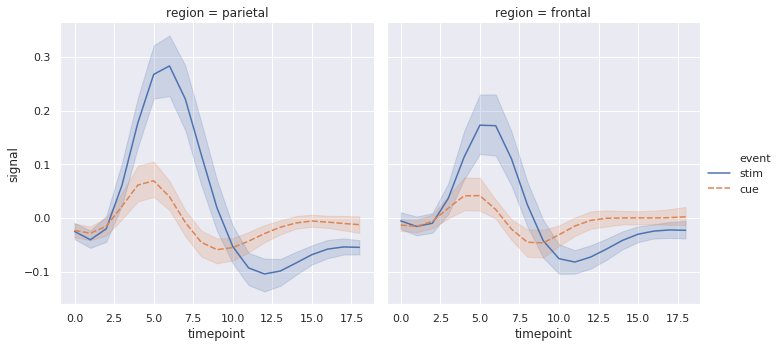

In [10]:
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

对于类型变量，绘制使用的函数是catplot。

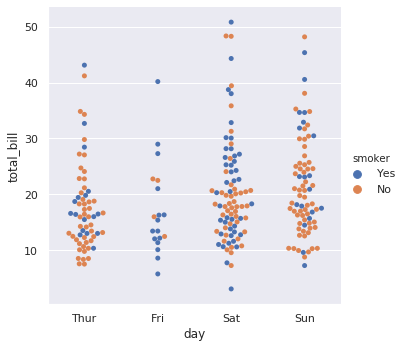

In [11]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

此外，还可以使用核密度估计来表示数据可能的分布：

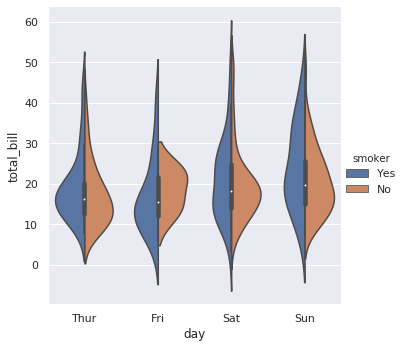

In [12]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

上面记录的都是figure一级的函数，它们都是可以在多个axes上绘制图形的（比如使用matplotlib绘制散点图时用scatterplot函数，这个函数就是axes级的，因为它们是在一个matplotlib的轴上绘图的，不会影响其他部分）。它们能处理一些比如在坐标轴外放置图例等麻烦的操作。它们操作了axes级的函数，这其中它们用到FacetGrid。每个figure级的函数都会联合使用axes级的函数和FacetGrid对象。FacetGrid对象是figure级函数返回的对象。

seaborn在控制axes级的函数方面和matplotlib不同，matplotlib中绘制多axes的图时，需要分别控制每个axes图，比如宽度和高度，而seaborn主要是整体上的控制，调整比例，比如宽高比。

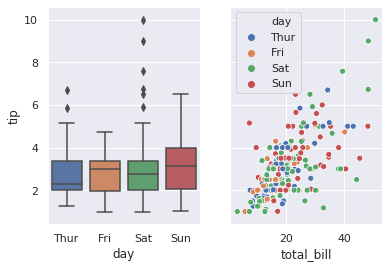

In [13]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);

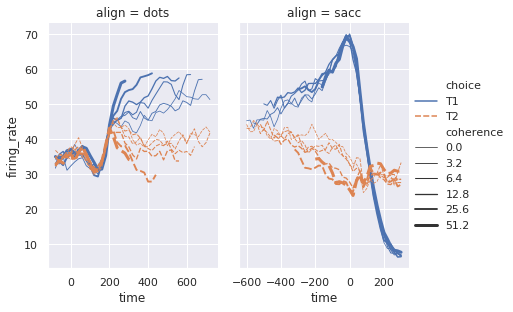

In [14]:
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            height=4.5, aspect=2 / 3,
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

还有一些可以可视化数据的结构的绘图函数，比如下面这个可以按区间给出一些数据的量：

In [15]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


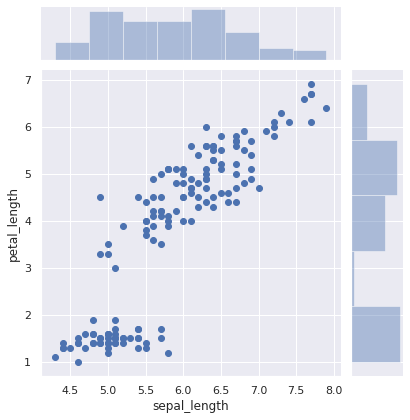

In [16]:
sns.jointplot(x="sepal_length", y="petal_length", data=iris);

还有一个比较重要的内容：定制plot。首先就是使用不同的主题，主题一换，全图都换。

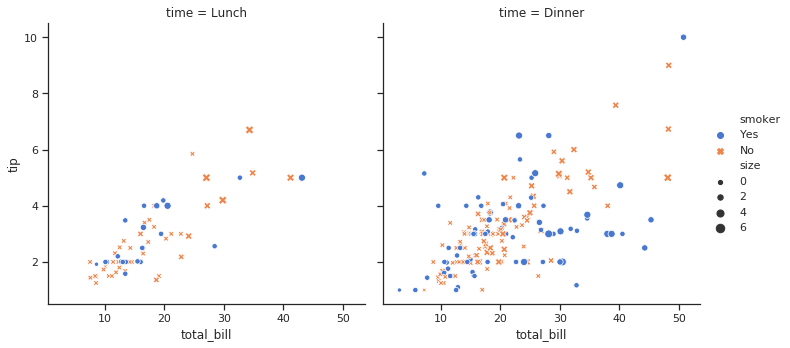

In [17]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

第二种就是figure级别上的特定设置。

所有的seaborn函数都会接受一些可选的参数来切换某些默认的设置。比如调颜色，这方面可以参考：[extensive support for customizing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)。颜色通常是比其他图形样式更重要的方面，因为如果用的好，它能很好的揭示数据的模式。关于如何较好地配色有一些很好的资料：[series of blog posts from Rob Simmon](https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/) and [this more technical paper](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf). matplotlib官方也给出了一个很好的[tutorial](https://matplotlib.org/tutorials/colors/colormaps.html)。Rob Simmon的blog是NASA earth observatory网站里的东西，NASA各种漂亮的图想必和它们也有些关系吧，因此在[另外一文](ElegantFigures.md)中简单地记录一下这些blog的主要内容。这里就不再赘述了。

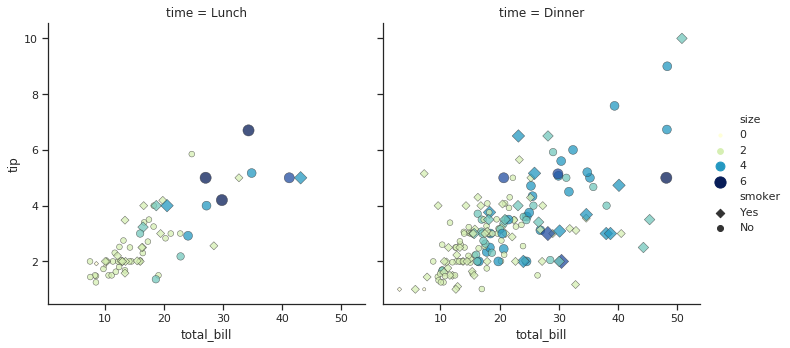

In [18]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

seaborn中选择调色板是很容易的。最重要的工具就是color_palette()函数了。该函数提供了接口使得我们可以很多方式起来生成颜色，并且可以让任意一个有palette参数的函数调用。

该函数能接受任意seaborn调色板或matplotlib颜色图的名称，也能接受一系列以任意matplotlib格式（RGB等）指定的颜色。

没有参数的话就是默认的调色板。

另外，要想给数据配置一个最好的调色板，是要了解数据的特性。seaborn按数据的不同给出了三个general的类型的调色板： qualitative, sequential, 和 diverging.

当想要区分没有内在顺序的数据的离散数据块时，可以使用Qualitative color palettes。有6个默认的主题， deep, muted, pastel, bright, dark, and colorblind.

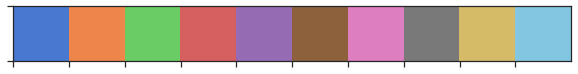

In [19]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

其他颜色可以在实际使用时再选择，这里暂不记录了。Sequential color palettes颜色板适用于数据范围从相对低值到相对高值的情况。

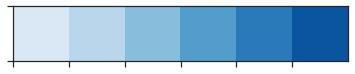

In [22]:
sns.palplot(sns.color_palette("Blues"))

Diverging color palettes用于对大的低值和高值都感兴趣的数据。数据中通常还有一个定义良好的中点。如果您正在绘制从某个基线时间点开始的温度变化，那么最好使用一个发散的颜色映射来显示相对减少的区域和相对增加的区域。

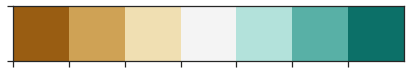

In [23]:
sns.palplot(sns.color_palette("BrBG", 7))

前面说了一些颜色的配置，另外还可以通过传递给FacetGrid的其他参数来完成图形级函数的一些自定义，并且可以使用该对象上的方法来控制图形的许多其他属性。为了进行更多的调整，可以访问绘制绘图的matplotlib对象，这些对象存储为属性。

不过对于relplot()和其他图形级函数，有几个间接层，因为relplot()将其exta关键字参数传递给底层的seaborn axis级函数，后者将其额外的关键字参数传递给底层的matplotlib函数。因此，可能需要花费一些努力才能找到需要使用的参数的正确的文档，但是在原则上，非常高的自定义级别是可能的。

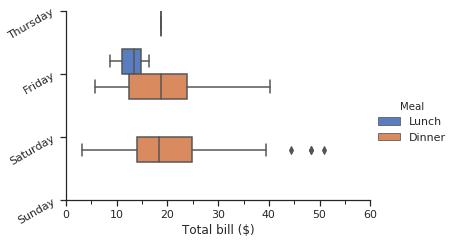

In [24]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);

seaborn的图形级函数是面向有效探索的，因此使用seaborn函数来管理需要精确调整大小和组织的图形可能比直接在matplotlib中设置图形和使用相应的轴级要花费更多的精力。Matplotlib有一个全面而强大的API;图的任何属性都可以根据您的喜好进行更改。

所以比较好的构图方式是seaborn的高级接口和matplotlib的深度自定义能力的组合，这将允许快速浏览数据和创建图形，可以裁剪成出版质量的最终产品。

接下来可以直接在官方文档的Gallery中快速地浏览seaborn能制作的图形。更多工具可以查看：[official tutorial](https://seaborn.pydata.org/tutorial.html#tutorial)和 [API reference](https://seaborn.pydata.org/api.html#api-ref)

## 实践

个人认为使用seaborn有两个比较重要的方面需要注意，一个就是如何用pandas将数据集调整为tidy dataset的pandas的dataframe，一个就是如何结合使用seaborn和matplotlib来使绘图变得既简单又有细节的定制调整。

接下来记录一些自己平常用到的图形的绘制。

### 时间序列图

绘制时间序列图。

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
values

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

注意数据的格式，既然是时间序列，那么index就是时间序列。然后后面每列是一个变量。

In [14]:
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846
2016-01-02,-1.979026,1.237704,0.057230,2.743267
2016-01-03,-2.945478,1.094025,1.628355,2.359988
2016-01-04,-2.307479,0.749367,1.624072,2.518347
2016-01-05,-3.270573,0.333310,1.867085,2.866550
...,...,...,...,...
2016-12-26,-19.091161,11.538091,-12.324271,15.728471
2016-12-27,-19.896686,9.886417,-11.185668,16.971170
2016-12-28,-20.162153,9.466580,-10.388869,17.955768
2016-12-29,-20.322964,9.636551,-7.977325,19.397242


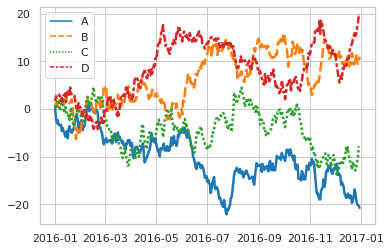

In [15]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

### 散点图

在matplotlib中绘制散点图已经比较方便，不过这里看看seaborn中更加直观的方式。这里除了参考官方文档，还重点参考了：[Scatter Plot in Python using Seaborn](https://etav.github.io/python/scatter_plot_python_seaborn.html)

In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


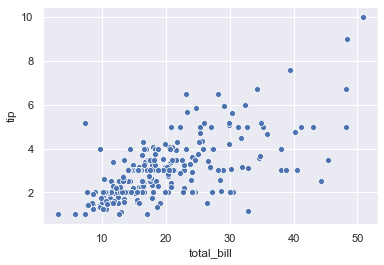

In [2]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

如果需要表示颜色的不同，很简单，直接设置hue即可：

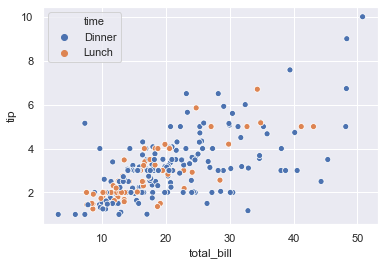

In [5]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

如果hue对应的是数字项，那么seaborn会自动分类：

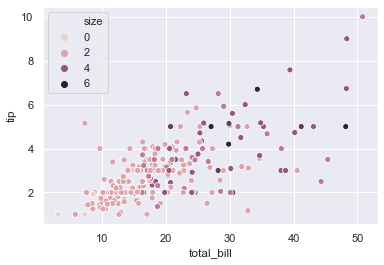

In [6]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="size", data=tips)

如果想要图例是个colorbar，而不是分类点，可以结合matplotlib一起使用会比较方便：

In [13]:
import pandas as pd
import seaborn as sb
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt

sb.set(font_scale=1.2, style="ticks") #set styling preferences
dataset = datasets.load_boston()

#convert to pandas data frame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()
df = df.rename(columns={'target': 'median_value', 'oldName2': 'newName2'})
df.DIS = df.DIS.round(0)
df.describe().round(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_value
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.0,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.0,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.0,5.0,330.0,19.0,391.4,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.0,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.0,24.0,711.0,22.0,396.9,38.0,50.0


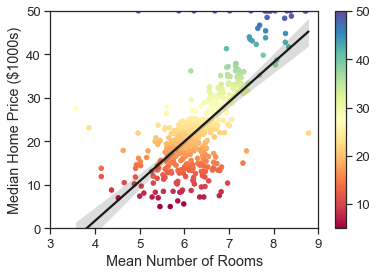

In [16]:
points = plt.scatter(df["RM"], df["median_value"],
                     c=df["median_value"], s=20, cmap="Spectral") #set style options

#add a color bar
plt.colorbar(points)

#set limits
plt.xlim(3, 9)
plt.ylim(0, 50)

#build the plot
plot = sb.regplot("RM", "median_value", data=df, scatter=False, color=".1")
plot = plot.set(ylabel='Median Home Price ($1000s)', xlabel='Mean Number of Rooms') #add labels

如上代码所示，使用了regplot来绘制回归线，另一个seaborn中绘制scatter图时经常使用的函数是implot。两者详解可以参考：[Seaborn(sns)官方文档学习笔记（第四章 线性关系的可视化）](https://zhuanlan.zhihu.com/p/27593869)

还使用tips数据演示：

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


regplot()和lmplot()是Seaborn中的两个主要的通过回归确定线性关系的可视化函数。这两个函数是密切相关的，并且共享了大部分的核心功能，不过他们也有不同，下面简单看下。

在最简单的调用中，两个函数都绘制了两个变量x和y的散点图，然后拟合回归模型y〜x并绘制了该回归线的结果回归线和95％置信区间：

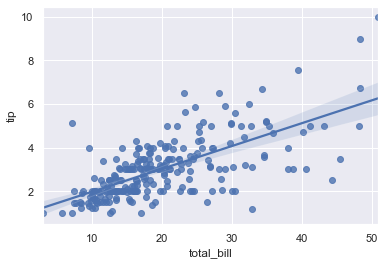

In [22]:
sns.regplot(x="total_bill", y="tip", data=tips)

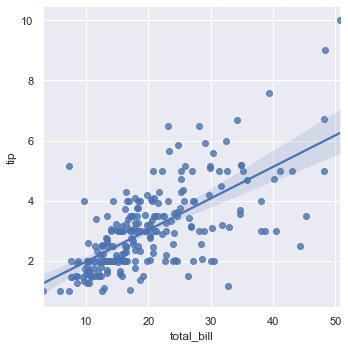

In [23]:
sns.lmplot(x="total_bill", y="tip", data=tips)

很显然，所得到的的图的结果是相同的，除了图形形状略有些不同。

- 两者的一个主要区别是regplot()以各种格式接受x和y变量，包括numpy数组、Pandas的Series列或DataFrame对象的变量引用；而lmplot()中x和y变量必须指定为字符串。
- regplot()可以看做是拥有lmplot()特征的一个子集

绘制多图时，官方给的例子是使用lmplot的：

In [18]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


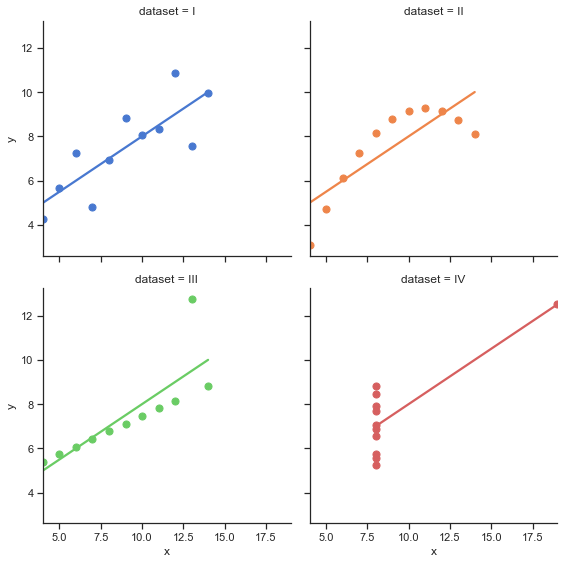

In [19]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

如果要展示数据集中不同变量之间的线性关系，可以使用pairplot，还是前面提到的tips数据：

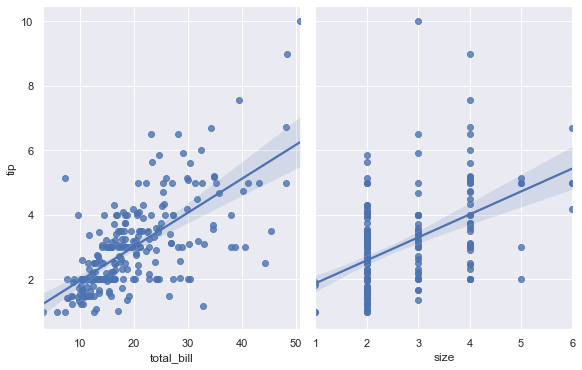

In [25]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

如果想要设置每个子图的坐标轴，可以使用如下方式，参考：[Individual axes limits for pairplot in python](https://stackoverflow.com/questions/51290828/individual-axes-limits-for-pairplot-in-python)

(0.0, 11.0)

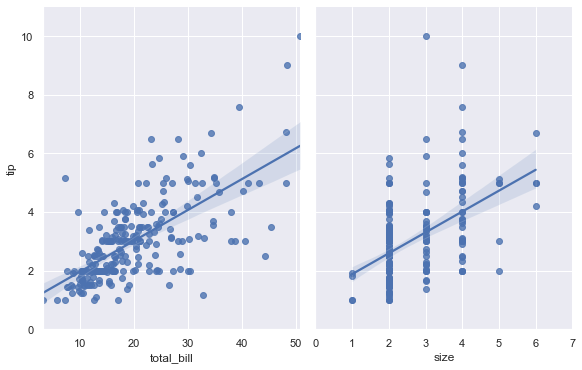

In [37]:
g=sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");
g.axes[0,1].set_xlim((0,7))
g.axes[0,0].set_ylim((0,11))

目前pairplot不能同时指定点的大小和kind='reg'，否则会报错，所以设置点大小时，要取消kind='reg'，所以这里是个bug，这种情况下，还是要使用matplotlib来绘图，具体例子可以参考本repo下的matplotlib一文里。

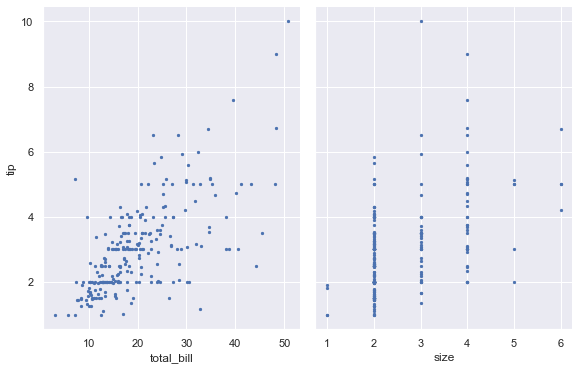

In [38]:
g=sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, plot_kws=dict(s=5, edgecolor="b", linewidth=1));

此外，如果想要绘制出变量的分布，可以使用jointplot：

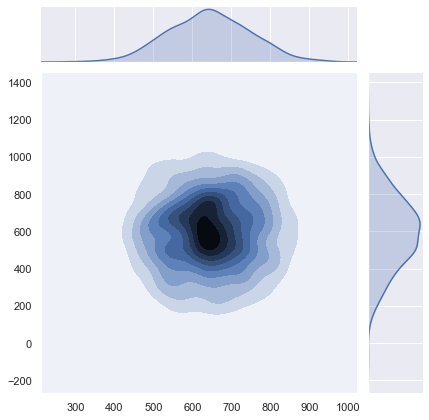

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# generate some random date
x = np.random.normal(loc=650, scale=100, size=1000)
y = np.random.normal(loc=600, scale=200, size=1000)

plot = sns.jointplot(x, y, kind="kde")
plot = sns.jointplot(x, y)
# 如果想要设置坐标轴范围可以：
# plot.ax_marg_x.set_xlim(0, 3000)
# plot.ax_marg_y.set_ylim(0, 1200)

前面重在散点图和回归的分析，现在看看分类散点图。

### 分类散点图

本小节主要参考了：[Seaborn(sns)官方文档学习笔记（第五章 分类数据的绘制）](https://zhuanlan.zhihu.com/p/27683042),[Python可视化 | Seaborn5分钟入门(四)——stripplot和swarmplot](https://zhuanlan.zhihu.com/p/38295294),[map-data points to colormap with seaborn swarmplot](https://stackoverflow.com/questions/40814612/map-data-points-to-colormap-with-seaborn-swarmplot),[Interpretable Machine Learning with Python](http://savvastjortjoglou.com/intrepretable-machine-learning-nfl-combine.html),[Plot Colorbar for stripplot](https://stackoverflow.com/questions/52870915/plot-colorbar-for-stripplot)等

分类数据情况下，散点图和回归模型方法将不起作用，所以用一些分类常用的图，非常实用的方法是将Seaborn的分类图分为三类：

- 将分类变量每个级别的每个观察结果显示出来：swarmplot()和stripplot()
- 显示每个观察分布的抽象表示:boxplot()和violinplot()
- 以及应用统计估计显示的权重趋势和置信区间：barplot()和pointplt()

尽管每个参数都有控制应用于该数据可视化细节的特定参数，但这些功能都共享一个基本的API。这节就线重点关注swarmplot和stripplot。

stripplot(分布散点图)，仍然使用tips数据来演示。

In [3]:
import seaborn as sns
%matplotlib inline
# sns.set(font_scale=1.5,style="white")
# sns.set_context({"figure.figsize":(10,8)})
data=sns.load_dataset("tips")  
data.head()  

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


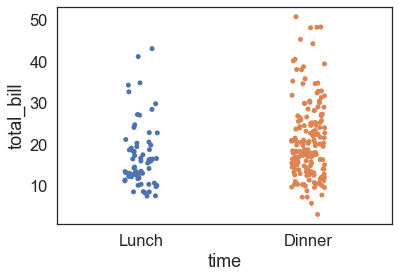

In [4]:
sns.stripplot(x="time",y="total_bill", data=data) 

可以看到stripplot的作图原理就是按照x属性所对应的类别分别展示y属性的值，适用于分类数据。上图就是不同饭点的账单总金额的散点图。有一些参数值得一提，比如jitter，如果想要数据点重合，可用该参数做一些调整：

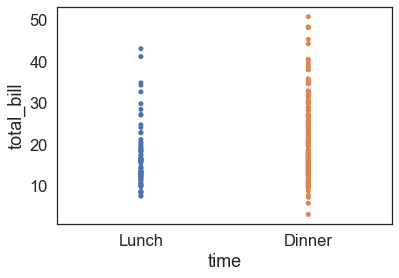

In [6]:
sns.stripplot(x="time",y="total_bill", data=data, jitter=False)

jitter使用了一些随机的“抖动”调整位置（仅沿着分类轴），可以看到下面的点的位置和上面的是有不同的。**抖动**是平时可视化中的常用的观察“密度”的方法，除了使用参数抖动，特定的抖动需求也可以用numpy在数据上处理实现

在对time属性分类后，可再利用hue参数进行内部的分类

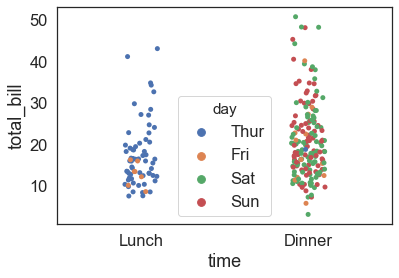

In [7]:
sns.stripplot(x="time",y="total_bill", data=data, jitter=True, hue="day") 

如果想把组内的不同类别分开来显示呢？这时候就用dodge参数

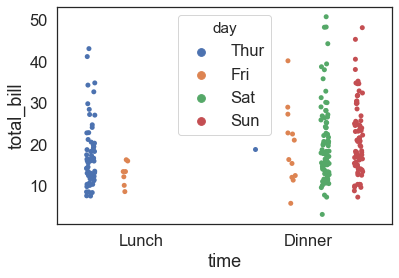

In [8]:
sns.stripplot(x="time",y="total_bill", data=data,jitter=True, hue="day",dodge=True) 

order:对x参数所选字段内的类别进行排序以及筛选

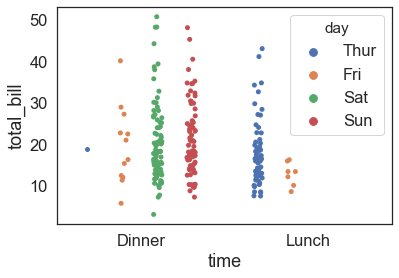

In [9]:
sns.stripplot(x="time",y="total_bill", data=data,jitter=True, hue="day",dodge=True, order=["Dinner","Lunch"])

可以看到x轴上原本的Dinner和Lunch类别的前后顺序变。

接下来看看swarmplot，前面提到stripplot使用jitter来产生一些随机的抖动，而swarmplot使用避免重叠点的算法将分类轴上的每个散点图点定位（道理上，即使抖动还是会有重叠的可能，所以这种方法可能更好）：

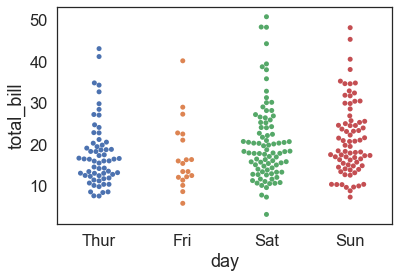

In [10]:
sns.swarmplot(x="day",y="total_bill", data=data)

可以看到swarmplot将不同类别的散点图以树状来显示，其他参数用法和stripplot一致，下面简单演示一下。

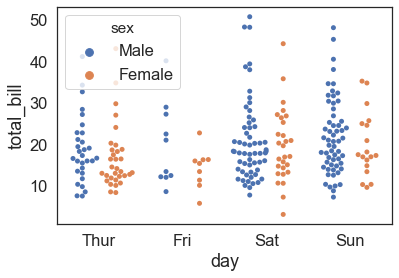

In [11]:
sns.swarmplot(x="day",y="total_bill", data=data,hue="sex", dodge=True)

(0.0, 60.0)

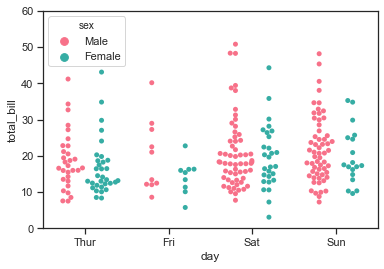

In [22]:
sns.swarmplot(x="day",y="total_bill", data=data,hue="sex", dodge=True,palette="husl")
# 如果想要设置坐标范围可以这样：
plt.ylim(0,60)

有时候，会想要一个colorbar来展示x项内的连续数据的变化，这时候可以这样，尝试使用palette：

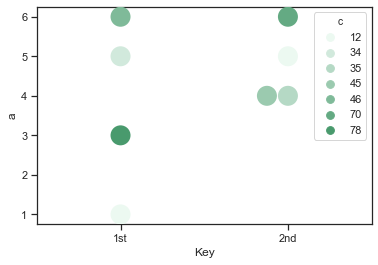

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct the dataframe from the question (the hardest part)
a = [1,4,5,6,3,4,5,6]
c = [12,35,12,46,78,45,34,70]
key = [1,2,2,1,1,2,1,2]
key = ["{k}{a}".format(k=k, a={1:"st", 2:"nd"}[k]) for k in key]
df  =pd.DataFrame({"a":a, "c":c, "Key":key})

palette = sns.light_palette("seagreen", reverse=False,  n_colors=len(c) )
sns.swarmplot(x='Key', y = 'a',  hue='c',s=20, data = df, palette=palette)

不过这还是分类的，如果想要完整连续颜色，需要的代码会麻烦一些，和前面绘制regplot时候加colormap一样，也需要配合matplotlib来使用：

In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colorbar
import matplotlib.colors
import matplotlib.cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

# recreate the dataframe
a = [1,4,5,6,3,4,5,6]
c = [12,35,12,46,78,45,34,70]
key = [1,2,2,1,1,2,1,2]
key = ["{k}{a}".format(k=k, a={1:"st", 2:"nd"}[k]) for k in key]
df  =pd.DataFrame({"a":a, "c":c, "Key":key})
df

,a,c,Key
0,1,12,1st
1,4,35,2nd
2,5,12,2nd
3,6,46,1st
4,3,78,1st
5,4,45,2nd
6,5,34,1st
7,6,70,2nd


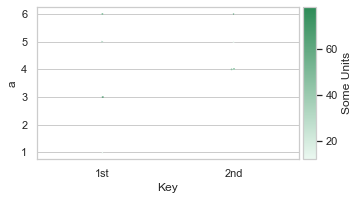

In [10]:
#Create a matplotlib colormap from the sns seagreen color palette
cmap = sns.light_palette("seagreen", reverse=False, as_cmap=True )
# cmap = sns.color_palette("Spectral")
# Normalize to the range of possible values from df["c"]
norm = matplotlib.colors.Normalize(vmin=df["c"].min(), vmax=df["c"].max())
# create a color dictionary (value in c : color from colormap) 
colors = {}
for cval in df["c"]:
    colors.update({cval : cmap(norm(cval))})

#create a figure
fig = plt.figure(figsize=(5,2.8))
#plot the swarmplot with the colors dictionary as palette
m = sns.swarmplot(x='Key', y = 'a',  hue="c", s=2, data = df, palette = colors)
# remove the legend, because we want to set a colorbar instead
plt.gca().legend_.remove()

## create colorbar ##
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
fig.add_axes(ax_cb)
cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Some Units')

一个更简洁的例子：

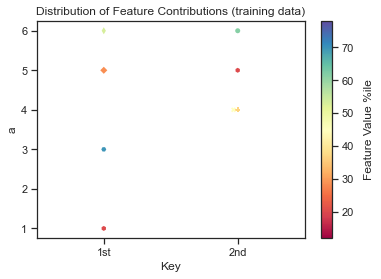

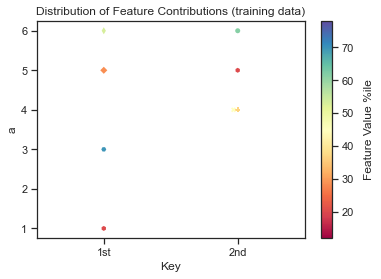

In [47]:
from matplotlib.cm import ScalarMappable
def swarmplot_with_cbar(cmap_str, cbar_label, *args, **kwargs):
    fig = plt.gcf()
    ax = sns.swarmplot(*args, **kwargs)
    # remove the legend, because we want to set a colorbar instead
    ax.legend().remove()
    ## create colorbar ##
#     cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)
    cmap = plt.get_cmap(cmap_str)
    for criteria in kwargs:
        # if any criteria is not matched, we can filter this site
        if criteria == 'hue':
            hue_name = kwargs[criteria]
        if criteria == 'data':
            df1 = kwargs[criteria]
        if criteria == 'palette':
            color_str = kwargs[criteria]
    assert color_str == cmap_str
    norm = plt.Normalize(df1[hue_name].min(), df1[hue_name].max())
    sm =  ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label(cbar_label, labelpad=10)    
    return fig

# cmap_str = 'viridis'
cmap_str = 'Spectral'
cbar_label = 'Feature Value %ile'
plt.title('Distribution of Feature Contributions (training data)')
swarmplot_with_cbar(cmap_str, cbar_label, x='Key', y = 'a',  hue="c", palette=cmap_str, data=df)

### 分类分布图

常见的比如箱线图boxplot()，还有就是violonplot()等

In [1]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


tips是tidy data，图是二维图，x是横轴，选择一个变量，y是纵轴，也只能代表一个变量。hue是色彩对应的图例，palette则是颜色板。

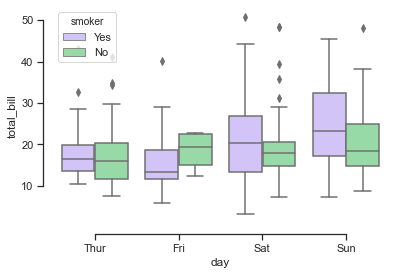

In [2]:
# Draw a nested boxplot to show bills by day and time
sns_box=sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

如果需要旋转坐标字以防止重叠，则可以这样：

[None, None, None, None, None, None, None, None]

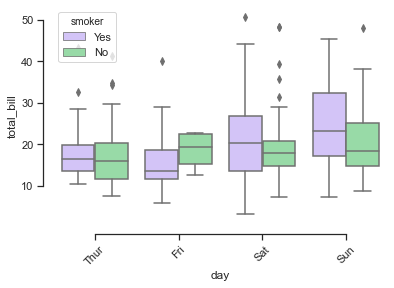

In [16]:
# Draw a nested boxplot to show bills by day and time
sns_box=sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

如果想要保存绘制的图形，可以使用如下命令：

In [17]:
fig = sns_box.get_figure()
fig.savefig('fig/box.png') #路径+文件名

接下来首先看看如果数据不是tidy data的话，应该怎么转换过来。举一些例子，主要参考了：[tidy-data-python](https://github.com/nickhould/tidy-data-python)和[Python_TidyData](https://github.com/AnalyticsInsightsNinja/Python_TidyData)

In [18]:
import pandas as pd
df = pd.read_csv("./data/pew-raw.csv")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


使用pandas的melt函数，来快速实现向tidy data的转换。

In [19]:
formatted_df = pd.melt(df,["religion"], var_name="income", value_name="freq")
formatted_df = formatted_df.sort_values(by=["religion"])
formatted_df.head(10)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


如果想要控制boxplot的颜色，参考：[#33 Control colors of boxplot | seaborn](https://python-graph-gallery.com/33-control-colors-of-boxplot-seaborn/)，可以这么设置：

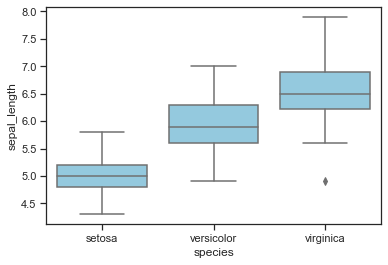

In [26]:
import seaborn as sns
df = sns.load_dataset('iris')
sns.boxplot( x=df["species"], y=df["sepal_length"], color="skyblue")
#sns.plt.show()

箱线图可以和前面的swarmplot一起，比如：

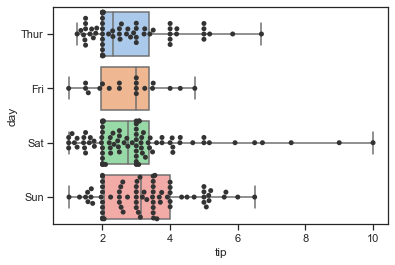

In [21]:
import numpy as np
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips, color=".2")

关于分类变量，除了scatterplot和distribution plot，还有estimate plot，比如 pointplot等，这些用到再说，接下来补充下更高一级的调用这些axes-level funcs的函数。

### 多分类变量图

主要记录下catplot函数的使用。catplot可以调用不同形式的分类图，如前所述，在seaborn中包括以下几种类型：

- Categorical scatterplots:
    - stripplot() (with kind="strip"; the default)
    - swarmplot() (with kind="swarm")
- Categorical distribution plots:
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")
- Categorical estimate plots:
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")

In [13]:
import seaborn as sns
sns.set(style="ticks")
exercise = sns.load_dataset("exercise")
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


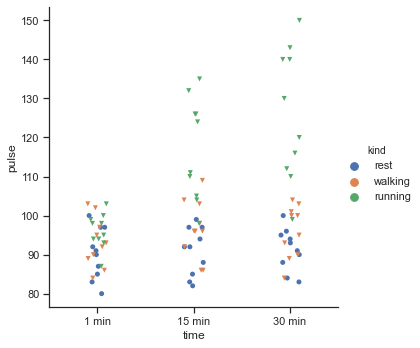

In [14]:
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

前面说了可以调用不同的分类图类型，这里可以换一个图看看

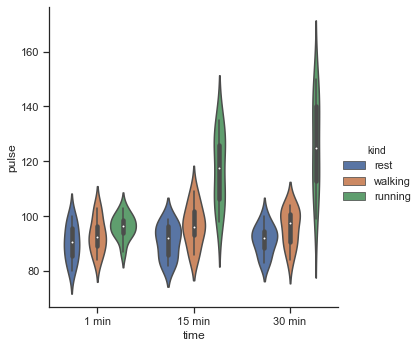

In [15]:
g = sns.catplot(x="time", y="pulse", hue="kind",
               data=exercise, kind="violin")

如果想展示和更多变量的关系，比如再增加一个分类变量，可以这样：

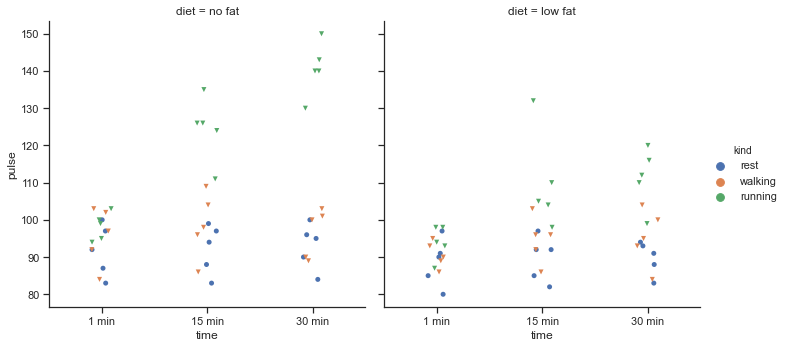

In [16]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise)

如果想要调整一些成图细节，比如高度，比例等，可以：

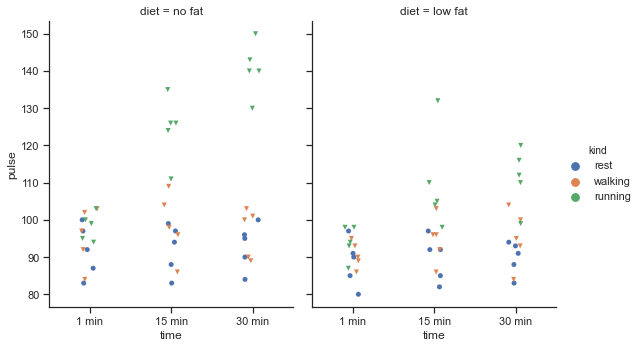

In [17]:
g = sns.catplot(x="time", y="pulse", hue="kind",
                col="diet", data=exercise,
                height=5, aspect=.8)

catplot其实就是结合了一个分类图和FacetGrid，关于FacetGrid，可以参考下面Grid图一小节里的记录。如果想要使用swarmplot和facetgrid，最好使用catplot，否则顺序上会出现错误。

再看一个catplot的例子

In [78]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


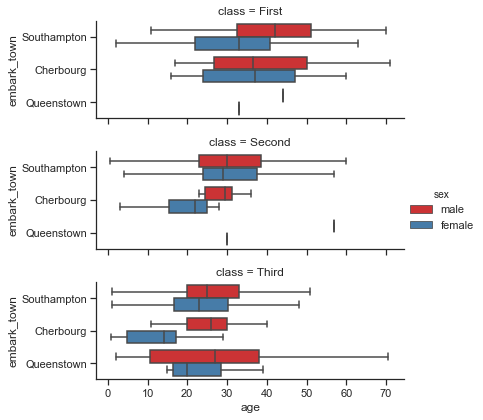

In [94]:
g = sns.catplot(x="age", y="embark_town",
                hue="sex", row="class",
                data=titanic[titanic.embark_town.notnull()],
                orient="h", height=2, aspect=3, palette="Set1",
                kind="box", dodge=True, showfliers=False)

### Grid 图

绘制多图矩阵，在seaborn中使用的是FacetGrid。这部分可以参考：[axis_grids](https://seaborn.pydata.org/tutorial/axis_grids.html)。

grid图也称为lattice或trellis图。matplotlib提供了很好的对 multiple axes 的支持，seaborn是在此基础上建立的，并直接将plot的结构和数据集的结构联系起来。数据格式必须是tidy data。即每列是一个变量，每行是一个observation。前面已经说了，这里不再赘述。看例子：

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


看数据格式，row定义了每行的对象，col就是定义了grid的每列绘图对象。如下代码所示，FacetGrid只是提供了绘图的框框。

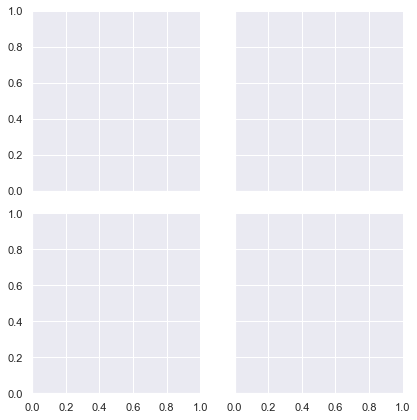

In [8]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

具体绘制什么图由g.map+plt.hist定义，即调用FacetGrid对象的map函数，通过指定matplotlib的绘图类型为参数来绘制。

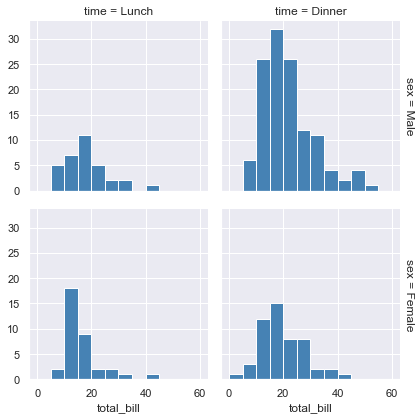

In [10]:
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

plt.hist只指定一个变量，不过比如scatter图就需要指定两个变量了，x变量在前，y变量在后。

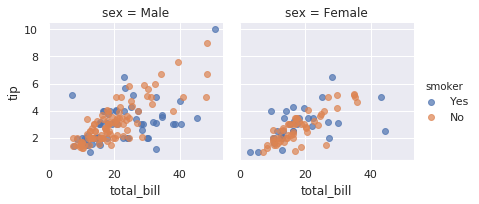

In [29]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

也可以绘制折线图(alpha表示透明度)：

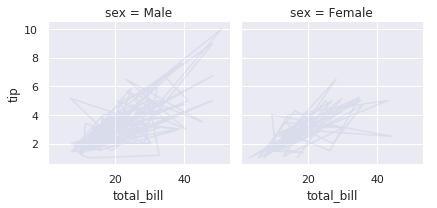

In [8]:
g = sns.FacetGrid(tips,row=None, col="sex")
g.map(plt.plot, "total_bill", "tip", alpha=.7)
g.add_legend()

还有箱线图，不过箱线图和facetgrid联合使用与别的图稍微有点区别：根据[官网所述](https://seaborn.pydata.org/generated/seaborn.boxplot.html)，需要使用 catplot() 函数来整合 boxplot() 和 FacetGrid. This allows grouping within additional categorical variables. 使用 catplot() 比直接使用 FacetGrid 更安全, 因为它保证了 synchronization of variable order across facets:

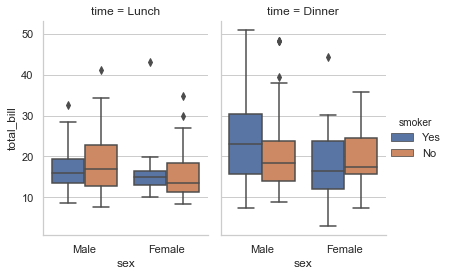

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);

如果想要在FacetGrid图上加一个colorbar的图例，那么就需要费点功夫了。这里主要参考了：[Scatterplot with point colors representing a continuous variable in seaborn FacetGrid](https://stackoverflow.com/questions/44641669/scatterplot-with-point-colors-representing-a-continuous-variable-in-seaborn-face). 更多资料可以查看：[Seaborn FacetGrid - Place single colorbar after last subplot](https://stackoverflow.com/questions/49875722/seaborn-facetgrid-place-single-colorbar-after-last-subplot)，[FacetGrid with independent colorbars](https://github.com/pydata/xarray/issues/1387)

先给出一个scatterplot的例子。

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


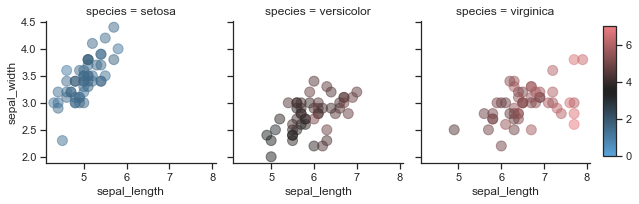

In [49]:
g = sns.FacetGrid(iris, col='species', palette = 'seismic')

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color") # Supply a 'c' argument or a 'color' kwarg but not both，所以要排除
    plt.scatter(x, y, c=c, **kwargs)

vmin, vmax = 0, 7
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(facet_scatter, 'sepal_length', 'sepal_width', "petal_length",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

代码的基本逻辑是这样的，首先定义FacetGrid，col表示grid的每列分别对应什么情况。

然后给出colorbar的值的范围，接着使用diverging_palette指定一个调色板来定义grid里面用的颜色，后面colorbar会用相同的颜色。

然后就是在FacetGrid里面绘图了，绘图的时候使用的数值范围，颜色板都是上面给出的。

接下来就为了给colorbar腾出位置，调整了以下grid图的空间

然后就是定义一个新的axe用来放colorbar

接着就是为了画colorbar，要给其配一个mappable的对象，当然因为不能干扰真的图，所以这里是个空图。然后画上这个空图就可以把colorbar显示出来了。

接下来用同样的逻辑画一个分类相关的图，首先看正常的三个分类变量，不用catplot，用swarmplot和facetgrid来画

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


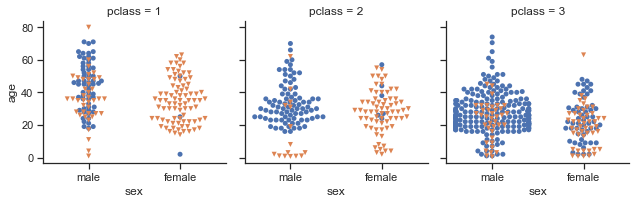

In [58]:
g = sns.FacetGrid(titanic, col='pclass', hue='survived')
g = g.map(sns.swarmplot, 'sex', 'age', order=["male", "female"], hue_order=[0, 1])

以下代码虽然能运行了，但是好像顺序出错了，这也是官方文档为什么给出建议使用catplot的原因。

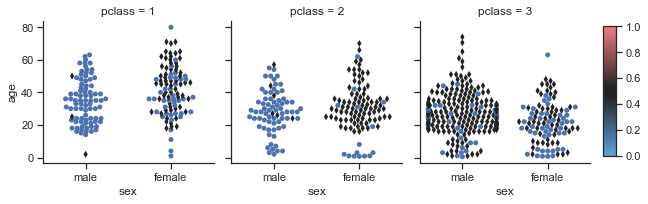

In [77]:
g = sns.FacetGrid(titanic, col='pclass') #,  palette = 'seismic'

def swarmplot_without_legend(x, y,hue, vmin,vmax,cmap, **kwargs):
    fig = plt.gcf()
    ax = sns.swarmplot(x, y, hue, **kwargs)
    # remove the legend, because we want to set a colorbar instead
    ax.legend().remove()
    norm = plt.Normalize(vmin, vmax)
    sm =  ScalarMappable(norm=norm, cmap=cmap)
    return fig


vmin= titanic["survived"].min()
vmax = titanic["survived"].max()
cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

g = g.map(swarmplot_without_legend, 'sex', 'age', 'survived',
          vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

### Subplot

上面看到的gird图，其每行的纵坐标都是一样的，目前暂时还没在官方文档里看到一行内纵坐标不同的，这种情况需要用到subplot图。这部分参考了：[Subplot for seaborn boxplot](https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot),[https://jovianlin.io/data-visualization-seaborn-part-3/](https://jovianlin.io/data-visualization-seaborn-part-3/)

In [10]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'a' :['one','one','two','two','one','two','one','one','one','two'], 'b': [1,2,1,2,1,2,1,2,1,1], 'c': [1,2,3,4,6,1,2,3,4,6]})
# df = pd.DataFrame({'a' :['one','one','one','one','one','one','one','one','one','one'], 'b': [1,2,1,2,1,2,1,2,1,1], 'c': [1,2,3,4,6,1,2,3,4,6]})
df

,a,b,c
0,one,1,1
1,one,2,2
2,two,1,3
3,two,2,4
4,one,1,6
5,two,2,1
6,one,1,2
7,one,2,3
8,one,1,4
9,two,1,6


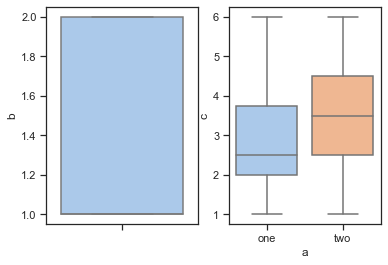

In [16]:
f, axes = plt.subplots(1, 2)
sns.boxplot(  y="b", data=df,  orient='v' , ax=axes[0])
sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[1])

也可以多绘制一些子图

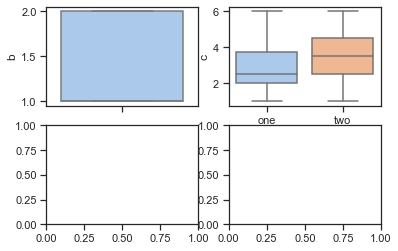

In [14]:
f, axes = plt.subplots(2, 2)
sns.boxplot(  y="b", data=df,  orient='v' , ax=axes[0,0])
sns.boxplot(  y="c", x= "a", data=df,  orient='v' , ax=axes[0,1])

多axes的subplots直接就是fig，因此不用get_figure()，直接可以保存。

In [25]:
fig = f
fig.savefig('fig/subplot.png') #路径+文件名

### 定制图形

比如定制grid各个子单元的大小范围，坐标轴等。还是上面的一个例子，接下来看看如何进行图形的形状设置。这小节主要参考了官方文档：[Building structured multi-plot grids](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


比如设置height来定义每个图的高度。设置aspect可以来设置每个子图的高宽比例，数值越大，代表越宽。

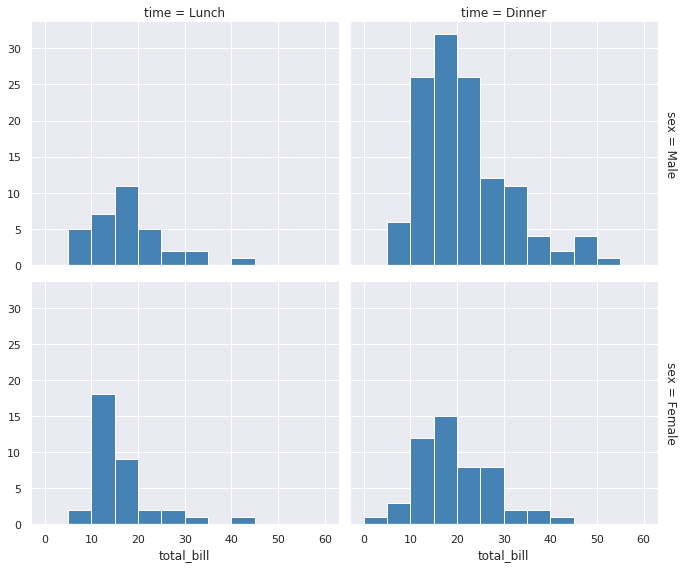

In [6]:
g = sns.FacetGrid(tips, row="sex", col="time", height=4,aspect=1.2,margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

### 直方图与分布曲线

这一小部分主要参考：https://seaborn.pydata.org/tutorial/distributions.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

在seaborn中绘制与分布相关的图使用的是distplot函数，绘制单变量的比较简单， distplot() 函数默认绘制一个直方图 histogram 并拟合一个 kernel density estimate (KDE).

In [5]:
x = np.random.normal(size=100)
x

array([-1.68277193,  1.66870425, -0.35795687,  1.3692356 , -1.45180096,
       -1.33192867,  2.01320697, -0.37943393, -1.91655889, -1.14808421,
        0.17568699,  1.51411226, -0.10410814,  0.63794045, -0.35661924,
        0.2397554 , -0.9750329 , -1.08969661,  0.15471212,  0.85455498,
        0.02622485, -0.19404861, -0.62755832, -0.39121967, -0.30754538,
        0.31805769,  0.5071151 , -0.73222673,  0.24985623,  0.07107652,
        0.31788625, -0.51837892,  0.24249163, -0.06445998, -0.88687506,
       -2.18438632,  0.16391132, -1.3887482 ,  1.12243797,  0.78111387,
        0.87924652,  1.0188498 , -1.41517229,  2.24810882,  1.82413557,
       -0.46350822, -0.79168799,  0.38610871, -1.56215381, -1.0226545 ,
       -0.98488552, -0.90838621, -0.94284116, -1.70227126,  0.79681313,
        1.60643073, -0.72977788,  0.45271321, -0.43604006,  0.35009863,
        0.81469483,  0.53316681, -2.34179599,  0.72244257,  2.10959024,
       -0.50277856,  0.41185163, -0.6475489 , -1.04405618, -0.30

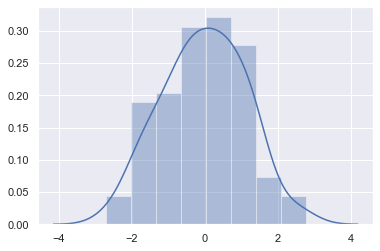

In [2]:
sns.distplot(x);

seaborn中的直方图histogram和matplotlib的hist函数类似，直方图通过生成一系列代表数据范围的bins来展示数据分布，每个bin会画一个bar来展示数量。

在seaborn中去掉KDE就可以只展示histogram了。还可以设置rug参数，给出每个范围bin内的值的位置

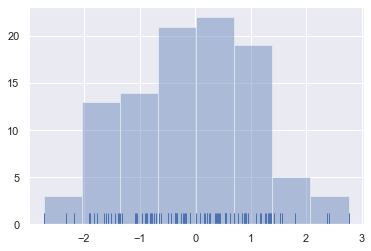

In [3]:
sns.distplot(x, kde=False, rug=True);

绘制 histograms 时, 主要的选择是bins的数量，范围，在 distplot() 函数中默认的是会做一个好的猜测来选择合适的数量，自己可以通过尝试来看看不同数量的bin会如何展示数据：

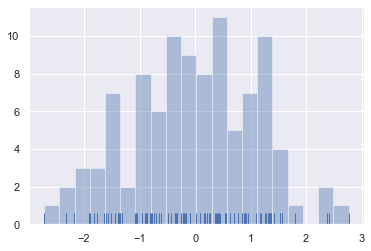

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True);

接下来看看分布曲线，一个累计分布的例子：

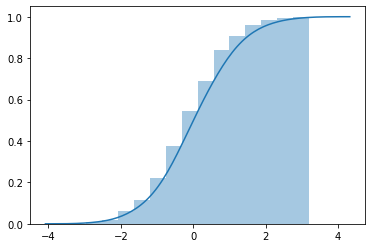

In [1]:
import numpy as np
import seaborn as sns

x = np.random.randn(200)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

### 折线图

In [44]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


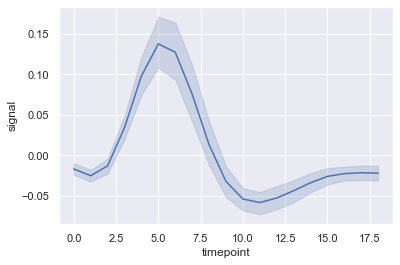

In [41]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

如果要在一张图上绘制多个曲线，需要分组，也就是在其中一栏将数据标记不同的组别，这里就是event一栏下有不同的标记：

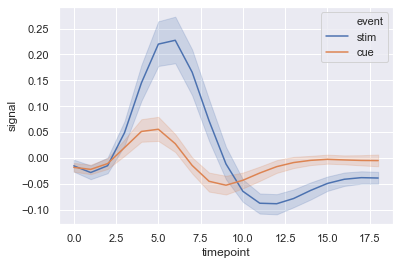

In [42]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event",
                  data=fmri)

如果同时还有另一种分类，则可以使用style来指定另一个分类

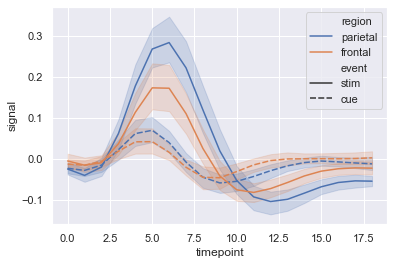

In [43]:
ax = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

seaborn默认的折线图是有区间估计的。如果想去掉，可以使用下面的方式：

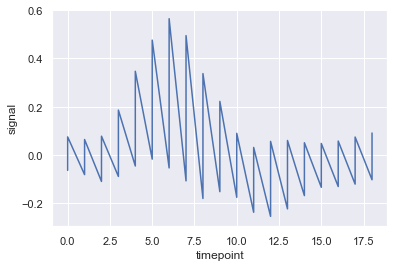

In [4]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri, estimator=None)

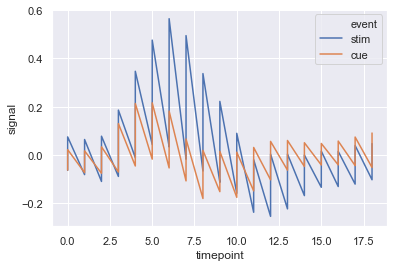

In [4]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event",data=fmri, estimator=None)

比如绘制经验频率曲线，参考：[Empirical cumulative distribution function (ECDF) in Python](https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/)

In [5]:
import numpy as np
import pandas as pd
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,y = ecdf(fmri['signal'])
df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,-0.255486,0.000940
1,-0.238474,0.001880
2,-0.224351,0.002820
3,-0.181241,0.003759
4,-0.178510,0.004699


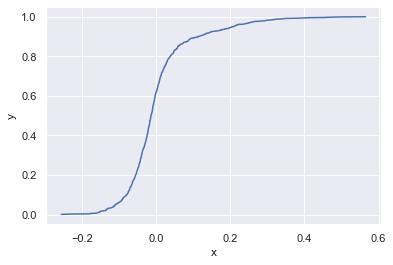

In [6]:
ax = sns.lineplot(x="x", y="y", data=df, estimator=None)

如果要画两条线，可以这样：

In [21]:
data1 = np.random.uniform(0,1,100)
data2 = np.random.uniform(0,1,100)
x1,y = ecdf(data1)
x2,y = ecdf(data2)
xs=[x1,x2]
frames = []
for i in range(2):
    df_dict_i = {}
    str_i = "x" + str(i)
    df_dict_i["x"] = xs[i]
    df_dict_i["y"] = y
    df_dict_i["variable"] = np.full([xs[i].size], str_i)
    df_i = pd.DataFrame(df_dict_i)
    frames.append(df_i)
result = pd.concat(frames)
result

,x,y,variable
0,0.053919,0.01,x0
1,0.054386,0.02,x0
2,0.068384,0.03,x0
3,0.072574,0.04,x0
4,0.091648,0.05,x0
...,...,...,...
95,0.951934,0.96,x1
96,0.961734,0.97,x1
97,0.977078,0.98,x1
98,0.977683,0.99,x1


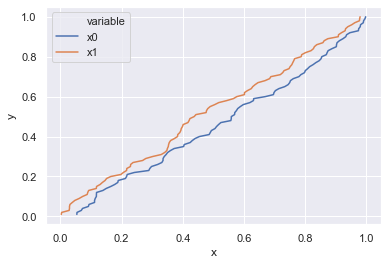

In [22]:
ax = sns.lineplot(x="x", y="y", hue="variable",data=result, estimator=None)

如果想要控制折线图的横纵坐标范围，可以使用：

(0.0, 0.6)

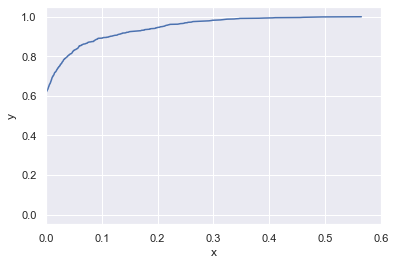

In [7]:
ax = sns.lineplot(x="x", y="y", data=df, estimator=None)
plt.xlim(xmin = 0.0)
plt.xlim(xmax = 0.6)

如果想要调整网格线，可以使用如下代码

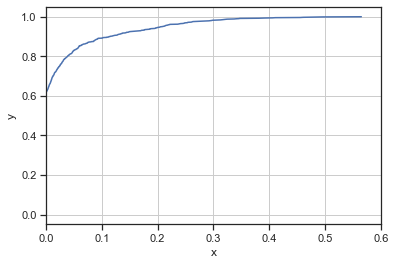

In [13]:
sns.set_style("ticks", {'axes.grid' : True})
ax = sns.lineplot(x="x", y="y", data=df, estimator=None).set(xlim=(0, 0.6))

如果想要调整坐标轴刻度大小可以使用如下方式：

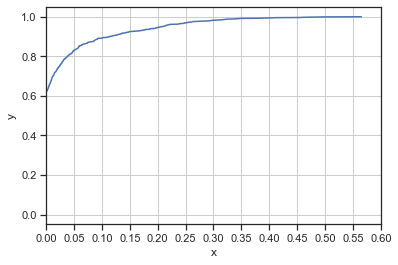

In [21]:
plt.xticks(np.arange(0, 1, 0.05)) 
ax = sns.lineplot(x="x", y="y", data=df, estimator=None).set(xlim=(0, 0.6))

或者使用如下方式：

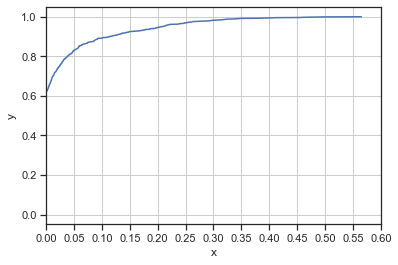

In [22]:
ax = sns.lineplot(x="x", y="y", data=df, estimator=None).set(xlim=(0, 0.6),xticks = np.arange(0, 1, 0.05))